## Chapter 13 Use and Remove Trends


#### Trends in Time Series

A trend is a long-term increase or decrease in the level of the time series.

##### 1. Types of Trends

There are all kinds of trends. Two general classes that we may think about are:
- Deterministic Trends: These are trends that consistently increase or decrease.
- Stochastic Trends: These are trends that increase and decrease inconsistently.

In general, deterministic trends are easier to identify and remove.

We can think about trends in terms of
their scope of observations.
- Global Trends: These are trends that apply to the whole time series.
- Local Trends: These are trends that apply to parts or subsequences of a time series.

Generally, global trends are easier to identify and address.

##### 2. Identifying a Trend

You can plot time series data to see if a trend is obvious or not. The diﬃculty is that in practice, identifying a trend in a time series can be a subjective process. As such, extracting or removing it from the time series can be just as subjective. Create line plots of your data and inspect the plots for obvious trends. Add linear and nonlinear trend lines to your plots and see if a trend is obvious.

##### 3. Removing a Trend

A time series with a trend is called non-stationary. An identified trend can be modeled. Once modeled, it can be removed from the time series dataset. This is called **detrending** the time series. If a dataset does not have a trend or we successfully remove the trend, the dataset is said to be trend stationary.

##### 4. Using Time Series Trends in Machine Learning

From a machine learning perspective, a trend in your data represents two opportunities:
- Remove Information: To remove systematic information that distorts the relationship between input and output variables.
- Add Information: To add systematic information to improve the relationship between input and output variables.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
ßseries = pd.read_csv('data/shampoo-sales.csv', index_col=0)
series.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


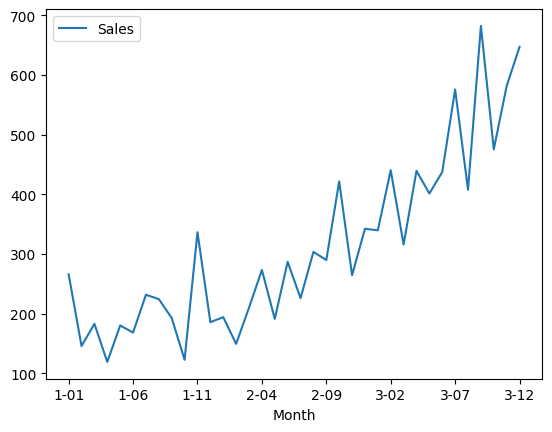

In [13]:
series.plot()
plt.show()

#### Detrend by Differencing

Perhaps the simplest method to detrend a time series is by diﬀerencing. Specifically, a new series is constructed where the value at the current time step is calculated as the diﬀerence between the original observation and the observation at the previous time step.

value(t) = observation(t) - observation(t-1)

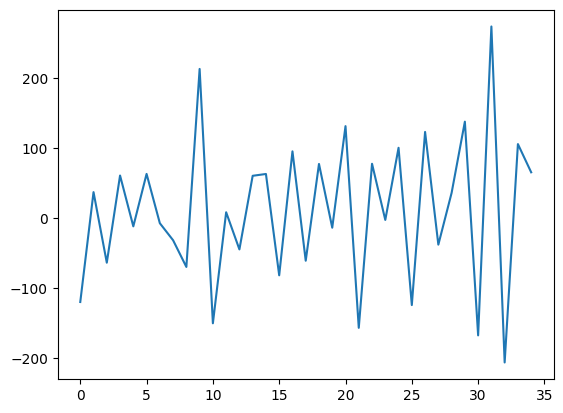

In [18]:
# detrend a time series using differencing
X = series['Sales'].values
diff = list()
for i in range(1, len(X)):
  value = X[i] - X[i-1]
  diff.append(value)

plt.plot(diff)
plt.show()

This approach works well for data with a linear trend. If the trend is quadratic (the change in the trend also increases or decreases), then a diﬀerence of the already-diﬀerenced dataset can be taken, a second level of diﬀerencing. This process can be further repeated if needed.

#### Detrend by Model Fitting

Linear trends can be summarized by a linear model, and nonlinear trends may be best summarized using a polynomial or other curve-fitting method. In addition to being used as a trend identification tool, these fit models can also be used to detrend a time series. For example, a linear model can be fit on the time index to predict the observation. The predictions from this model will form a straight line that can be taken as the trend line for the dataset. These predictions can also be subtracted from the original time series to provide a detrended version of the dataset.

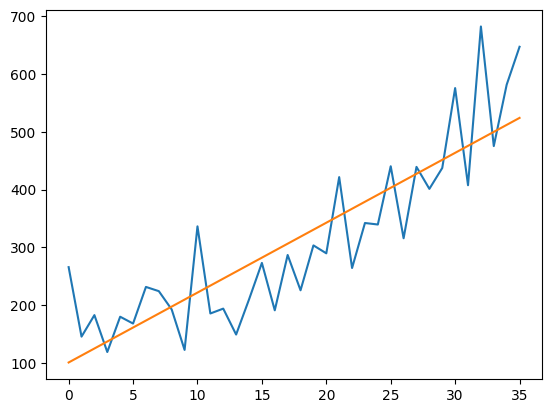

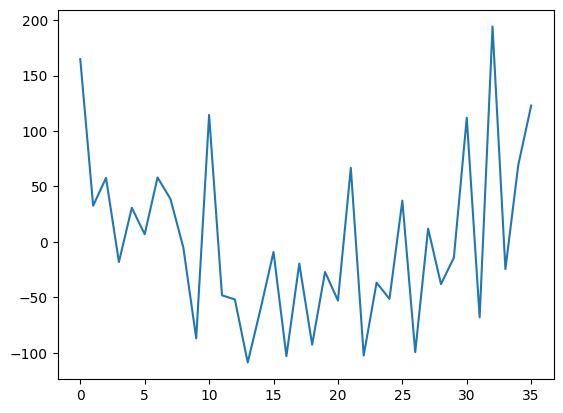

In [24]:
# use a linear model to detrend a time series
from sklearn.linear_model import LinearRegression

# fit linear model
X = [i for i in range(len(series))]
X = np.reshape(X, (len(X), 1))
y = series['Sales'].values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)

# plot trend
plt.plot(y)
plt.plot(trend)
plt.show()

# detrend
detrended = [y[i] - trend[i] for i in range(len(series))]
# plot detrended
plt.plot(detrended)
plt.show()

Again, we can see that this approach has eﬀectively detrended the dataset. There may be a parabola in the residuals, suggesting that perhaps a polynomial fit may have done a better job.